In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set the dataset path
base_path = "/content/drive/MyDrive/Cats_Dogs_ML_Dataset/train/train/"



In [ ]:
import os

base_path = "/content/drive/MyDrive/Cats_Dogs_ML_Dataset/train/train/"


files = os.listdir(base_path)

print("Files inside /train/:")
print(files[:10])


Files inside /train/:
['dog.911.jpg', 'dog.9110.jpg', 'dog.9111.jpg', 'dog.9112.jpg', 'dog.9113.jpg', 'dog.9114.jpg', 'dog.9115.jpg', 'dog.9116.jpg', 'dog.9117.jpg', 'dog.9118.jpg']


In [ ]:
import os
from PIL import Image
import numpy as np

IMG_SIZE = 64
data = []
labels = []
max_images = 1000
count = 0

image_extensions = ('.jpg', '.jpeg', '.png')  # add others if needed

for img_name in os.listdir(base_path):
    if count >= max_images:
        break

    # Skip non-image files
    if not img_name.lower().endswith(image_extensions):
        continue

    img_path = os.path.join(base_path, img_name)

    try:
        with Image.open(img_path) as img:
            img = img.convert('L')  # grayscale
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img = np.array(img)
            data.append(img.flatten())
            label = 0 if 'cat' in img_name.lower() else 1
            labels.append(label)
            count += 1

            if count % 100 == 0:
                print(f"Loaded {count} images...")

    except Exception as e:
        print(f"Skipped {img_name}: {e}")

X = np.array(data) / 255.0
y = np.array(labels)

print(f"✅ Total images loaded: {len(X)}")


Loaded 100 images...
Loaded 200 images...
Loaded 300 images...
Loaded 400 images...
Loaded 500 images...
Loaded 600 images...
Loaded 700 images...
Loaded 800 images...
Loaded 900 images...
Loaded 1000 images...
✅ Total images loaded: 1000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear')  # You can also try 'rbf' later
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.985

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
IMG_SIZE = 64
data = []
labels = []

cat_count = 0
dog_count = 0
max_per_class = 500

for img_name in os.listdir(base_path):
    img_path = os.path.join(base_path, img_name)

    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    try:
        label = 0 if 'cat' in img_name.lower() else 1

        if label == 0 and cat_count >= max_per_class:
            continue
        if label == 1 and dog_count >= max_per_class:
            continue

        with Image.open(img_path) as img:
            img = img.convert('L')  # grayscale
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img = np.array(img)
            data.append(img.flatten())
            labels.append(label)

            if label == 0:
                cat_count += 1
            else:
                dog_count += 1

            if (cat_count + dog_count) % 100 == 0:
                print(f"Loaded {cat_count + dog_count} images...")

        if cat_count >= max_per_class and dog_count >= max_per_class:
            break

    except Exception as e:
        print(f"Skipped {img_name}: {e}")

X = np.array(data) / 255.0
y = np.array(labels)

print(f" Loaded {len(X)} images: {cat_count} cats and {dog_count} dogs")


Loaded 100 images...
Loaded 200 images...
Loaded 300 images...
Loaded 400 images...
Loaded 500 images...
Loaded 600 images...
Loaded 700 images...
Loaded 800 images...
Loaded 900 images...
Loaded 1000 images...
 Loaded 1000 images: 500 cats and 500 dogs


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Stratified train/test split to preserve cat/dog balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM model
svm_model = SVC(kernel='linear')  # Try 'rbf' or 'poly' later for better results
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.55

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       100
           1       0.55      0.53      0.54       100

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



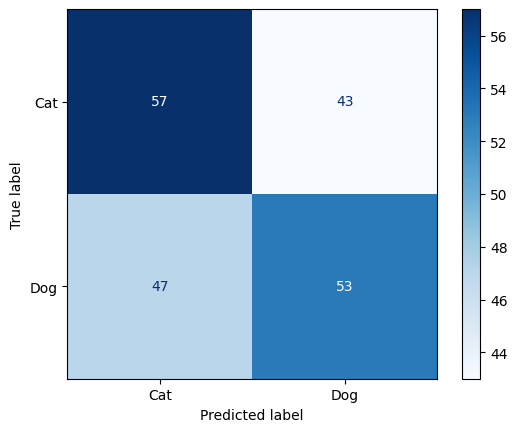

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')  # Use 'Oranges' or other for style
---

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model


In [ ]:
IMG_SIZE = 224


In [ ]:
base_path = "/content/drive/MyDrive/Cats_Dogs_ML_Dataset/train/train/"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

X = []
y = []

max_images = 1000  # or less if Colab crashes
count = 0

for img_name in os.listdir(base_path):
    if count >= max_images:
        break
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(base_path, img_name)

        # Load and resize image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)  # VGG16 preprocessing

        X.append(img_array)

        # Label encoding: cat = 0, dog = 1
        label = 0 if "cat" in img_name.lower() else 1
        y.append(label)

        count += 1
        if count % 100 == 0:
            print(f"Loaded {count} images...")

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Loaded 100 images...
Loaded 200 images...
Loaded 300 images...
Loaded 400 images...
Loaded 500 images...
Loaded 600 images...
Loaded 700 images...
Loaded 800 images...
Loaded 900 images...
Loaded 1000 images...
Shape of X: (1000, 224, 224, 3)
Shape of y: (1000,)


In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Load VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We'll use the output from the last convolutional block
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
features = model.predict(X, batch_size=32, verbose=1)

# Flatten features to feed into SVM
X_features = features.reshape(features.shape[0], -1)

print("Extracted Features Shape:", X_features.shape)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 601s 18s/step
Extracted Features Shape: (1000, 25088)


 Model Accuracy: 0.99

📊Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.99      1.00      0.99       197

    accuracy                           0.99       200
   macro avg       0.99      0.67      0.75       200
weighted avg       0.99      0.99      0.99       200



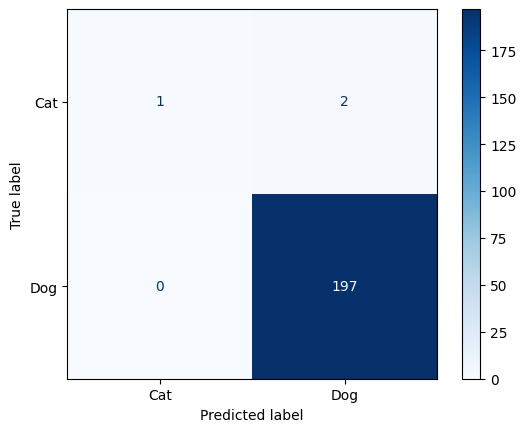

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split the VGG16 features and labels
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42, stratify=y)

# Train the SVM on VGG16 features
svm_model = SVC(kernel='linear')  # You can try 'rbf' or 'poly' later
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')


In [24]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print("Test set label distribution:", dict(zip(unique, counts)))


Test set label distribution: {np.int64(0): np.int64(3), np.int64(1): np.int64(197)}


In [25]:
X = []
y = []

# Load exactly 500 cats and 500 dogs
cat_images = sorted([f for f in os.listdir(base_path) if 'cat' in f.lower()])[:500]
dog_images = sorted([f for f in os.listdir(base_path) if 'dog' in f.lower()])[:500]

for img_name in cat_images + dog_images:
    img_path = os.path.join(base_path, img_name)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    X.append(img_array)

    label = 0 if 'cat' in img_name.lower() else 1
    y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Loaded Balanced Data:", X.shape, y.shape)
print("Label counts:", dict(zip(*np.unique(y, return_counts=True))))


✅ Loaded Balanced Data: (1000, 224, 224, 3) (1000,)
Label counts: {np.int64(0): np.int64(500), np.int64(1): np.int64(500)}


In [26]:
# Re-import if needed
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
features = model.predict(X, batch_size=32, verbose=1)

# Flatten for SVM
X_features = features.reshape(features.shape[0], -1)
print("Extracted Features Shape:", X_features.shape)


32/32 ━━━━━━━━━━━━━━━━━━━━ 591s 18s/step
Extracted Features Shape: (1000, 25088)


✅ Accuracy: 0.975

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.99      0.96      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



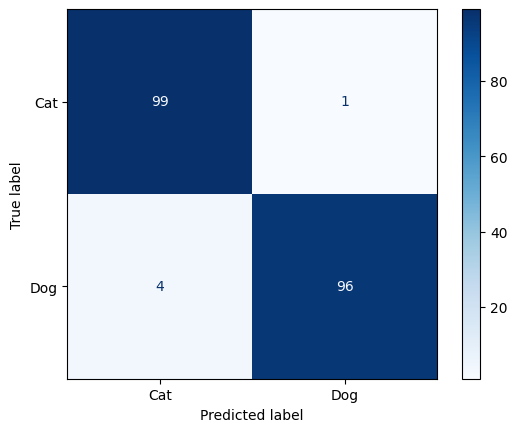

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train/test split with stratify (very important)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.show()
